<a href="https://colab.research.google.com/github/sonyakrasovskaya/EDA-KNN-Classification-Research/blob/main/EDA_research_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данный проект демонстрирует пошаговый процесс анализа табличных данных с использованием **разведочного анализа данных (EDA)** и построения классификатора на основе **метода k ближайших соседей (KNN)**.

### 🎯 Основные цели:
- Выполнить EDA: изучить распределения, пропуски, корреляции и выбросы.
- Провести масштабирование признаков для моделей машинного обучения.
- Построить и сравнить модели KNN при различных значениях `k`.
- Визуализировать результаты и метрики качества модели.
- Сформулировать выводы и потенциальные направления улучшений.

### 📘 Структура:
- `EDA_research_&_KNN.ipynb`: основной ноутбук, включающий как визуальный анализ, так и этап моделирования.

### 🧰 Используемые технологии:
- Python (Jupyter Notebook)
- `pandas`, `numpy`, `matplotlib`, `seaborn`
- `scikit-learn` для модели и метрик

### About the assignment

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

### 1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
# Читаем файл
df = pd.read_csv('train.csv', sep=',')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Количество входных данных -- 891 строка
12 колонок


In [ ]:
df.shape

(891, 12)

In [ ]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2

In [ ]:
print("\nSummary of the dataset:")
print(df.describe())



Summary of the dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Дискретные переменные:**

PassengerId – идентификатор пассажира .

Survived – бинарная переменная (0 = не выжил, 1 = выжил).

Pclass – порядковая переменная (класс билета: 1, 2, 3).

SibSp – число братьев/сестер/супругов на борту.

Parch – число родителей/детей на борту.

**Непрерывные переменные:**
Age – возраст пассажира.

Fare – стоимость билета (может быть дробной, например, 7.25 или 15.50).

**Номинальные переменные:**

Sex – пол (male, female).

Embarked – порт посадки (S, C, Q).

Cabin – номер каюты (много пропусков, содержит буквы и цифры, можно выделить первый символ как категорию).

Ticket – номер билета (сложная переменная, можно попробовать выделить паттерны).

**Порядковые (имеют естественный порядок):**

Pclass – класс билета (1, 2, 3) → можно оставить как число или закодировать как категорию.

### 3

**Линейная регрессия**

Задача: Предсказать количество членов семьи пассажира (родителей, детей, братьев/сестер) на борту корабля

Решение: Модель позволит понять, какие пассажиры путешествовали чаще с семьей, а какие — в одиночку.


**Классификация**

Задача: Определить, кто с большей вероятностью выживал в катастрофе, чтобы понять закономерности и факторы, влияющие на выживаемость.

Решение: Обучение классификационной модели, которая будет предсказывать, выживет пассажир или нет, на основе признаков (пол, возраст, класс билета, количество родственников/родителей и др.).

**Кластеризация**

Задача : Группировка пассажиров по схожим характеристикам

Решение: Можно выделить кластеры пассажиров, основываясь на их характеристиках, таких как класс каюты, цена билета, порт посадки, семейное положение (наличие родственников на борту), пол, возраст, чтобы выявить скрытые закономерности.  К примеру, что за группы пассажиров были более уязвимы во время катастрофы.


### 4

In [ ]:
# Считаем долю выживщих
survival_per = df["Survived"].mean()

# Считаем долю мужчин и женщин выживщих
survivors = df[df["Survived"] == 1]
gender_survival_proportion = survivors["Sex"].value_counts(normalize=True)

# Выводим результаты
print(f"The proportion of passengers who survived the catastrophe: {survival_per:.2%}")
print("Proportion of men and women among survivors:")
print(gender_survival_proportion)


The proportion of passengers who survived the catastrophe: 38.38%
Proportion of men and women among survivors:
Sex
female    0.681287
male      0.318713
Name: proportion, dtype: float64


### 5

In [ ]:
# Считаем сколько пассажиров в каждом классе
class_counts = df["Pclass"].value_counts()

# Выделяем наиболее заполненный класс
most_crowded_class = class_counts.idxmax()

# Считаем долю мужчин и женщин в самом заполненном классе
gender_most_crowded_class = df[df["Pclass"] == most_crowded_class]["Sex"].value_counts()

# Результат
print(f"Passengers were traveling in each class: {class_counts}")
print(f"The most crowded class: {most_crowded_class}")
print(gender_most_crowded_class)


Passengers were traveling in each class: Pclass
3    491
1    216
2    184
Name: count, dtype: int64
The most crowded class: 3
Sex
male      347
female    144
Name: count, dtype: int64


### 6

In [ ]:
#Общие показатели по пассажирам, которые заплатили за проезд
min_fare = df['Fare'].min()
avg_fare = df['Fare'].mean()
max_fare = df['Fare'].max()

#Показатели по пассажирам Southampton, которые заплатили за проезд
southampton_pass = df[df['Embarked'] == 'S']
min_fare_southampton_pass = southampton_pass['Fare'].min()
avg_fare_southampton_pass = southampton_pass['Fare'].mean()
max_fare_southampton_pass = southampton_pass['Fare'].max()

print(f"All Passengers: Min: {min_fare}, Average: {avg_fare}, Max: {max_fare}")
print(f"Southampton Passengers: Min: {min_fare_southampton_pass}, Average: {avg_fare_southampton_pass}, Max: {max_fare_southampton_pass}")

All Passengers: Min: 0.0, Average: 32.204207968574636, Max: 512.3292
Southampton Passengers: Min: 0.0, Average: 27.079811801242233, Max: 263.0



**Большинство пассажиров заплатили низкую цену за билет**:

Основная масса билетов стоит менее 100 единиц, причем наибольшее количество билетов находится около 0–10.
Это означает, что lower class пассажиры составляли основную долю на Титанике.

**Сравнение социально-экономического статуса пассажиров трех портов:**

*Southampton:*

Наибольшее количество пассажиров с билетами до 50.
Явно преобладает среди пассажиров с дешевыми билетами (третьего класса).

*Cherbourg:*

Имеет более равномерное распределение цен.

Есть значительное количество дорогих билетов (до 500).

Видно, что именно здесь садилось больше пассажиров первого класса.

*Queenstown:*

В основном очень дешевые билеты (до 20).
Почти все пассажиры Queenstown ехали в третьем классе.



**Выводы:**
Пассажиры из Cherbourg платили больше → вероятно, здесь садились богатые пассажиры первого класса.

Пассажиры из Southampton и Queenstown в основном ехали в третьем классе -- имели самые дешевые билеты.
        
Наибольшая концентрация пассажиров была в Southampton.
  


**Гипотезы:**

1) Можно предположить, что пассажиры из Cherbourg имели больше шансов на выживание, так как среди них больше богатых людей.

2)В Southampton и Queenstown много пассажиров третьего класса, а третий класс возможно имел низкую выживаемость.

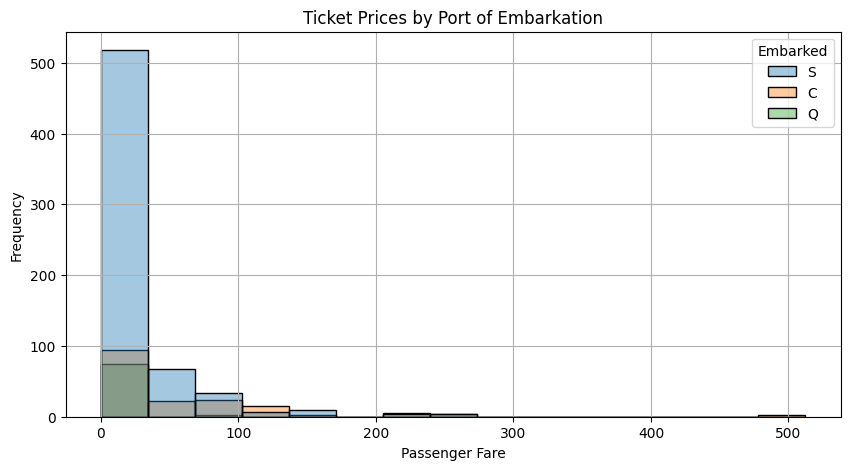

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(data=df, x="Fare", hue="Embarked", bins= 15, alpha=0.4)
plt.xlabel("Passenger Fare")
plt.ylabel("Frequency")
plt.title("Ticket Prices by Port of Embarkation")
plt.grid(True)
plt.show()

### 7

Какие признаки удаляем?

1) PassengerId -- это идентификатор пассажира, он никак не влияет на исследование.

2) Ticket -- номер билета не имеет закономерностей и уникален для каждого пассажира.

3) Cabin -- слишком много пропусков (~ 77% пустых значений). Как вариант, можно было бы взять первую букву каюты как индикатор класса, но в данном случае при таком малом заполнении лучше удалить.


Name -- имя само по себе не дает информации, но можно извлечь титулы (Mr., Miss., etc.), поэтому оставлю для дальнейшего анализа.

In [ ]:
df_corrected = df.drop(columns=['Cabin', 'Ticket', 'PassengerId'])
df_corrected

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### 8

In [ ]:
# Проверяем наличие пропущенных значений в каждом столбце
missing_values = df_corrected.isnull().sum()

# Отбираем только те столбцы, где есть пропуски
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)

# Вывод
print(f"\n Пропущенные значения в данных \n {missing_values}" )



 Пропущенные значения в данных 
 Age         177
Embarked      2
dtype: int64


### 9

1) Age 177 пропусков (~20%), заполняем медианой

2) Embarked	2 пропуска, заполняем модой (самым частым значением)

In [ ]:
# Заполняем медианой колонку Age
df_corrected["Age"].fillna(df_corrected["Age"].median(), inplace=True)

# Заполняем модой колонку Embarked
df_corrected["Embarked"].fillna(df_corrected["Embarked"].mode()[0], inplace=True)

# Проверяем, есть ли еще пропуски
df_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<ipython-input-199-ad20acc27d14>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corrected["Age"].fillna(df_corrected["Age"].median(), inplace=True)
<ipython-input-199-ad20acc27d14>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

### 10

**Связь между возрастом и ценой билета слабая:**

На графике нет четкой линии или явного тренда.
Пассажиры всех возрастов покупали как дешевые, так и дорогие билеты.
Корреляция близка к 0, что подтверждает слабую связь между возрастом и ценой билета.

**Большинство пассажиров покупали дешевые билеты:**

Основная масса точек сконцентрирована в нижней части графика (цены от 0 до 50).
Как уже было упомянуто выше, большинство пассажиров ехали в третьем классе, где билеты были дешевыми.

**Некоторые пассажиры (независимо от возраста) купили очень дорогие билеты:**

Видны отдельные выбросы в районе 200+ по цене билета.
Эти билеты, вероятно, принадлежали первому классу, где цена была самой высокой.
Дорогие билеты встречаются у пассажиров разного возраста, что подтверждает отсутствие связи с возрастом.

**Вывод:**
Возраст не является значимым фактором при покупке билета – люди всех возрастов могли путешествовать как в первом, так и в третьем классе.

**Гипотеза:**
Вероятно, важнее для цены билета класс (Pclass) -– билеты первого класса были дороже, а третьего – дешевле.

Correletion Between Passenger Age and Ticket Price: 0.10


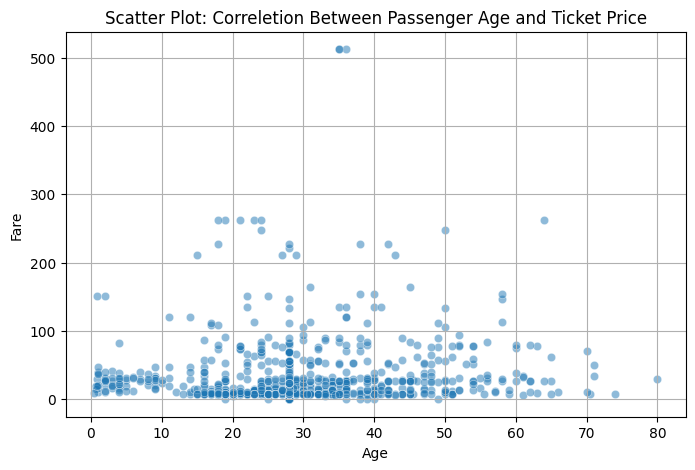

In [ ]:
# Вычисляем корреляцию между Age и Fare
correlation = df_corrected[['Age', 'Fare']].corr().iloc[0, 1]

# Выводим коэффициент корреляции
print(f"Correletion Between Passenger Age and Ticket Price: {correlation:.2f}")

# Строим scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_corrected, x='Age', y='Fare', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot: Correletion Between Passenger Age and Ticket Price")
plt.grid(True)
plt.show()

### 11

**Выживаемость в зависимости от цены билета**

Выжившие платили больше за билеты, чем погибшие.

Медиана цены билетов у выживших выше, чем у погибших.
Большинство погибших купили дешевые билеты, а среди выживших больше пассажиров с дорогими билетами.
Видны выбросы – пассажиры, купившие билеты дороже 200+ (вероятно, первый класс).
Это подтверждает, что более дорогие билеты давали больше шансов на выживание.

Price of ticket Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


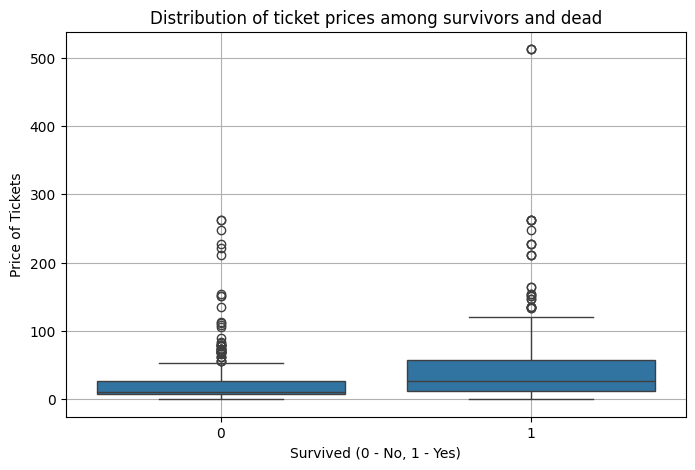

In [ ]:
# Считаем среднюю цену билетов для выживших и погибших
fare_survival = df_corrected.groupby("Survived")["Fare"].mean()
print(f'Price of ticket {fare_survival}')

# Строим ящиковую диаграмму стоимости билетов среди выживших и погибших
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Survived", y="Fare")
plt.xlabel("Survived (0 - No, 1 - Yes)")
plt.ylabel("Price of Tickets")
plt.title("Distribution of ticket prices among survivors and dead")
plt.grid(True)
plt.show()


**Выживаемость в зависимости от класса**

Чем выше класс, тем выше выживаемость.


1.   Пассажиры первого класса выживали чаще всего (~60-65%).  
2.   Во втором классе выживаемость ниже (~45%).
3.   В третьем классе меньше всего выживших (~25%).



**Гипотезы, почему так произошло:**

Пассажиры первого класса находились ближе к палубе -- быстрее получали доступ к шлюпкам.
Пассажиры третьего класса находились в нижних частях корабля -- у них было меньше времени на эвакуацию.

**Выводы:**
Цена билета влияет на выживаемость: более дорогие билеты (первый класс) давали больше шансов.

Класс билета – ключевой фактор: в первом классе выжило большинство пассажиров, в третьем – меньше всего.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


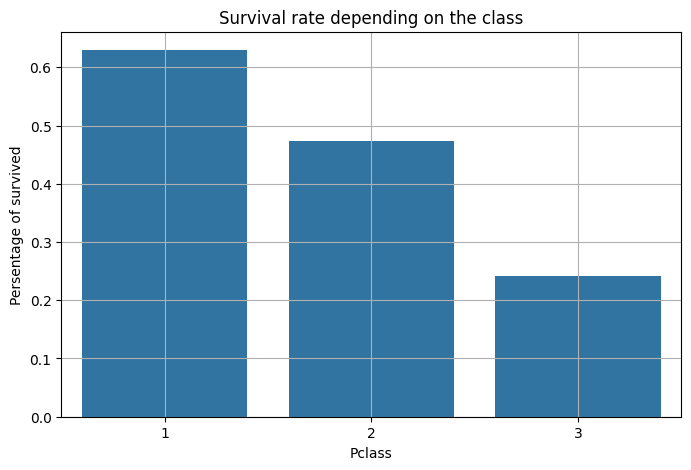

In [ ]:
# Считаем процент выживших в каждом классе
class_survival = df_corrected.groupby("Pclass")["Survived"].mean()
print(class_survival)

# Строим столбчатый график выживаемости по классам
plt.figure(figsize=(8, 5))
sns.barplot(x=class_survival.index, y=class_survival.values)
plt.xlabel("Pclass")
plt.ylabel("Persentage of survived")
plt.title("Survival rate depending on the class")
plt.grid(True)
plt.show()

### 12

In [ ]:
# Добавляем новый столбец Family (кол-во родственников у пассажира),учитывая его самого
df_corrected["Family"] = df_corrected["SibSp"] + df_corrected["Parch"] + 1  # +1, так как считаем самого пассажира
df_corrected

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


C помощью данного параметра можно сделать выводы о пасссажирах:

1) Люди с маленькими семьями (1-2 человека) выживали чаще.
Одинокие пассажиры (Family = 1) чаще погибали.

2) Большие семьи (5+) имели меньшие шансы на выживание из-за сложностей эвакуации. Люди с маленькими семьями (1-2 человека) выживали чаще.

3) Одинокие пассажиры (Family = 1) чаще погибали.
Большие семьи (5+) имели меньшие шансы на выживание, вероятно, из-за сложностей эвакуации.

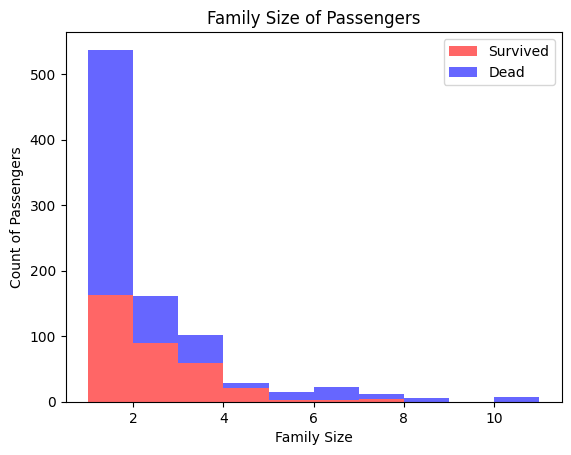

In [ ]:

plt.subplot()
plt.hist(
    x = [
        df_corrected[df_corrected['Survived'] == 1]['Family'],  # Выжившие
        df_corrected[df_corrected['Survived'] == 0]['Family']   # Погибшие
    ],
    stacked=True,
    color=['red', 'blue'],
    label=['Survived', 'Dead'],
    alpha=0.6
)

plt.title('Family Size of Passengers')
plt.xlabel('Family Size')
plt.ylabel('Count of Passengers')
plt.legend()

### 13

Создана еще одна колонка с определением возрастной группы пассажира Титаника. Чем это может помочь?

**1) Позволило выявить закономерности выживания среди разных возрастных групп**

Младенцы (Baby) выживали чаще всего (~70%), что подтверждает исторический факт, что детей спасали первыми.

Дети (Child) и подростки (Teenager) имели среднюю выживаемость (~40%). Вероятно, они также получали некоторый приоритет.

Низкий процент выживаемости у пожилых (Senior) (~22%), что может говорить о сложностях эвакуации и отсутствии приоритета при спасении.


**2) Помогло в интерпретации входных данных**

Без группировки возрастного признака график был бы сложнее читать.
Разделение по категориям (Baby, Child, Adult и т. д.) помог в объяснении датасета.
Как видно на графике, различия между группами наглядны.



<ipython-input-205-880a96a577c0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age = df_corrected.groupby('Age_group')['Survived'].mean() #Высчитываем среднее значение по возрастным группам по колонке Survived


Survival propotion by Age Group:
Age_group
Baby           0.704545
Child          0.424242
Teenager       0.403226
Adult          0.331096
Middle_Aged    0.420495
Senior         0.227273
Name: Survived, dtype: float64


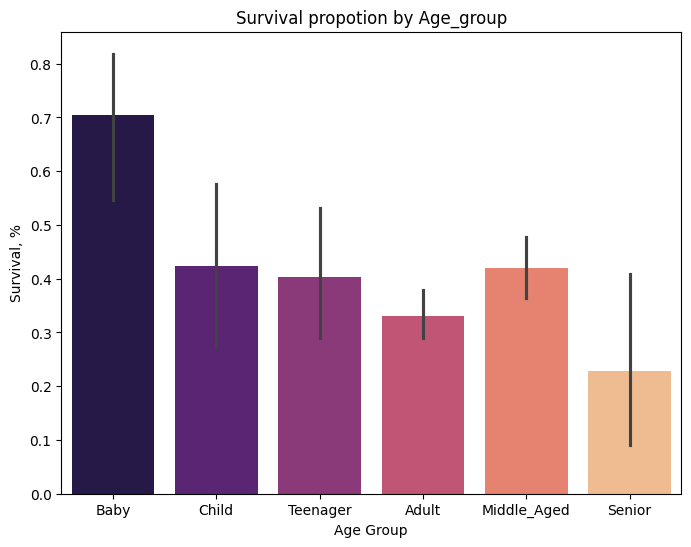

In [ ]:
df_corrected['Age_group'] = pd.cut(df_corrected['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'Middle_Aged', 'Senior']) # Проставляем метки возрастной группы
survival_age = df_corrected.groupby('Age_group')['Survived'].mean() #Высчитываем среднее значение по возрастным группам по колонке Survived

print("Survival propotion by Age Group:")
print(survival_age)

#Визуализация
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_group', y='Survived', data=df_corrected, order=['Baby', 'Child', 'Teenager', 'Adult', 'Middle_Aged', 'Senior'], hue='Age_group', palette='magma', legend=False)
plt.title('Survival propotion by Age_group')
plt.ylabel('Survival, %')
plt.xlabel('Age Group')
plt.show()

График показывает распределение возрастов среди выживших (красный) и погибших (синий) пассажиров на Титанике.

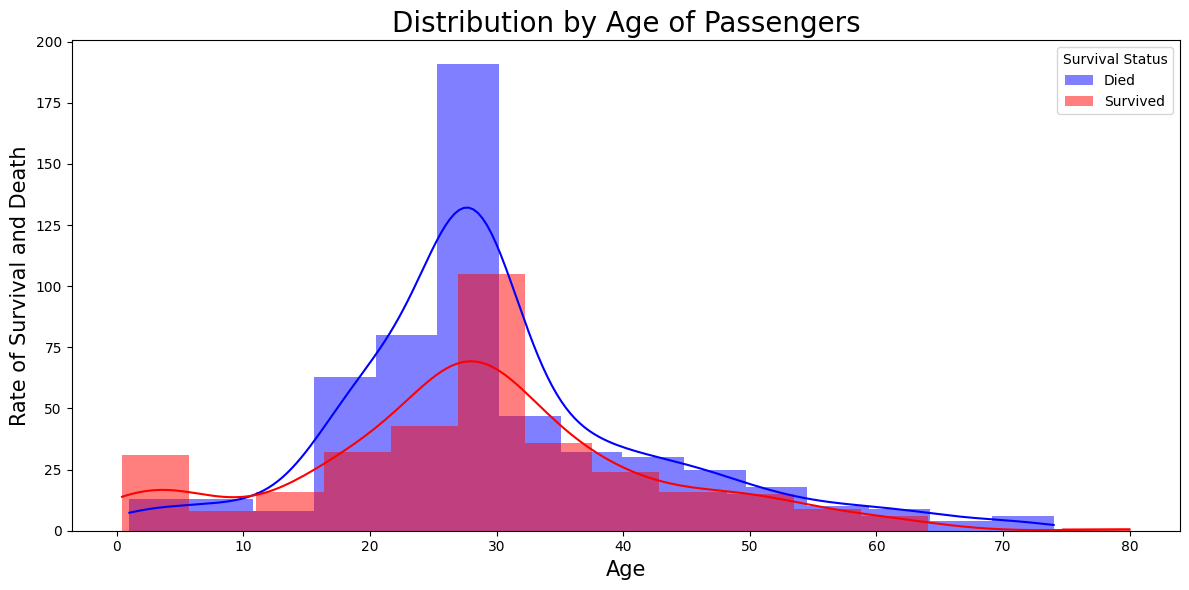

In [ ]:
# Фильтрация данных по возрасту и выживаемости
age_died = df_corrected[(df_corrected["Survived"] == 0)]
age_surv = df_corrected[(df_corrected["Survived"] == 1)]

# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 6))

# Строим гистограммы
sns.histplot(age_died["Age"], color="blue", bins=15, kde=True, linewidth=0, label="Died")
sns.histplot(age_surv["Age"], color="red", bins=15, kde=True, linewidth=0, label="Survived")

# Настройки графика
plt.title("Distribution by Age of Passengers", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Rate of Survival and Death", fontsize=15)
plt.legend(title="Survival Status")
plt.tight_layout()
plt.show()

### 14

Можно ли было предсказать выживание пассажира на основе других выживших с таким же фамильным именем?
Гипотеза: Если один человек из семьи выжил, возможно у остальных членов семьи тоже был высокий шанс выжить.


In [ ]:

# Извлекаем фамилию (первая часть имени до запятой)
df_corrected["LastName"] = df_corrected["Name"].apply(lambda x: x.split(",")[0])

# Группируем по фамилии и вычисляем среднюю вероятность выживания
family_survival = df_corrected.groupby("LastName")["Survived"].mean().reset_index()

# Фильтруем фамилии с хотя бы 2 пассажирами (чтобы убрать одиночные случаи)
family_counts = df_corrected["LastName"].value_counts()
common_families = family_counts[family_counts > 1].index
family_survival = family_survival[family_survival["LastName"].isin(common_families)]
family_survival


,LastName,Survived
1,Abbott,0.500000
2,Abelson,0.500000
10,Ali,0.000000
11,Allen,0.500000
12,Allison,0.333333
...,...,...
640,White,0.000000
641,Wick,1.000000
647,Williams,0.250000
653,Yasbeck,0.500000


На данном графике нам не важно рассматривать каждого пассажира, а для понимания общего паттерна среди пассажиров Титаника:

1) Если у семьи низкий процент выживания (~0.0) -- возможно, все родственники погибли ( если они были в третьем классе?).

2) Фамилии с разной выживаемостью (~0.5) --  могли быть разделены по классам или часть семьи смогла эвакуироваться, а другая нет.

3) Если у семьи высокий процент выживания (~1.0) -- возможно, они были в первом классе или имели преимущество при эвакуации.


<ipython-input-208-33b21f62f0b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=family_survival["LastName"], x=family_survival["Survived"], palette="magma")


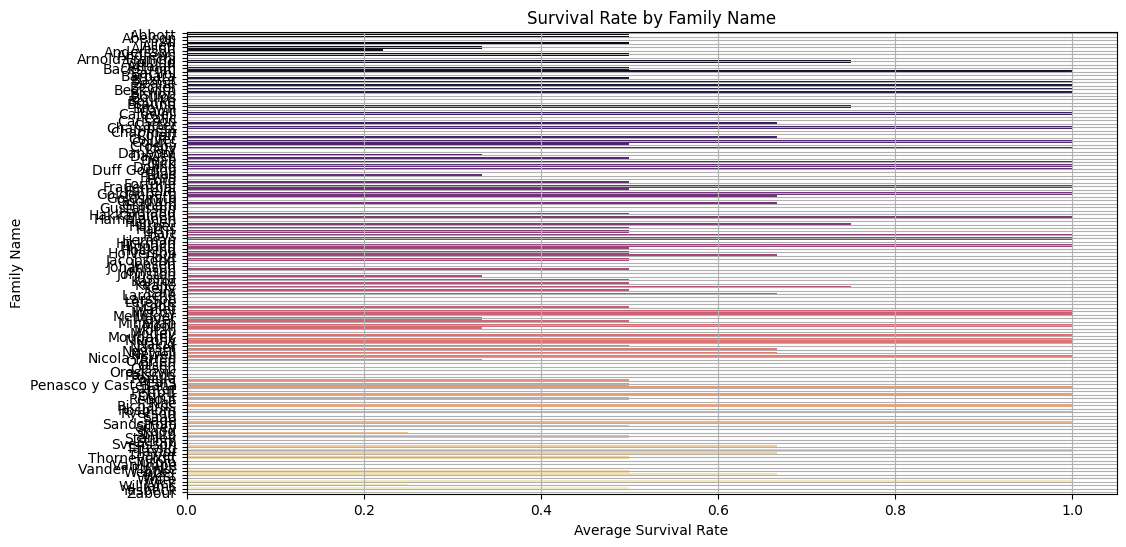

In [ ]:
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(y=family_survival["LastName"], x=family_survival["Survived"], palette="magma")

plt.xlabel("Average Survival Rate")
plt.ylabel("Family Name")
plt.title("Survival Rate by Family Name")
plt.grid(True)
plt.show()


### 15


**Есть ли разница между гистограммами «до» и «после» нормализации?**

Форма распределения по сути не меняется. Если признак был скошен (например, Fare сильно «вытянут» в правую сторону), то эта скошенность останется и после стандартной Z-преобразования.

Масштаб и центрирование заметно меняются. После Z-score нормализации среднее каждого признака становится 0, а стандартное отклонение — 1. Это видно по тому, как «сжались» или «растянулись» оси X.

Вывод: на уровне структуры распределения ничего не меняется, но численные значения переходят в новый масштаб (среднее 0, стандартное отклонение 1).

**Чем это может быть плохо с точки зрения анализа данных?**

Потеря исходного масштаба. При анализе в сырых данных измерения (единицы стоимости билетов, количество родственников и т.д.) может быть проще понимать, какие именно значения мы видим, например «пожилые пассажиры». После нормализации эти конкретные цифры модифицируются в -0.5 или +2.3 std, что сложнее интерпретировать напрямую без обратного преобразования.

Сильная скошенность всё равно сохраняется. Например, Fare также после Z-score будет иметь «длинный хвост». Если цель — приблизить распределение к нормальному, возможно потребуется дополнительная трансформация, а не только Z-score.

**Вывод:**

Нет особой разницы : после нормализации признаки не стали центрированными.

Теряется интерпретация в исходных единицах; если распределение сильно скошено, Z-score не решает проблему «длинных хвостов».

Нормализовать признаки нужно, если алгоритм чувствителен к масштабу. Но при анализе реальных значений может быть важен и сырой масштаб.


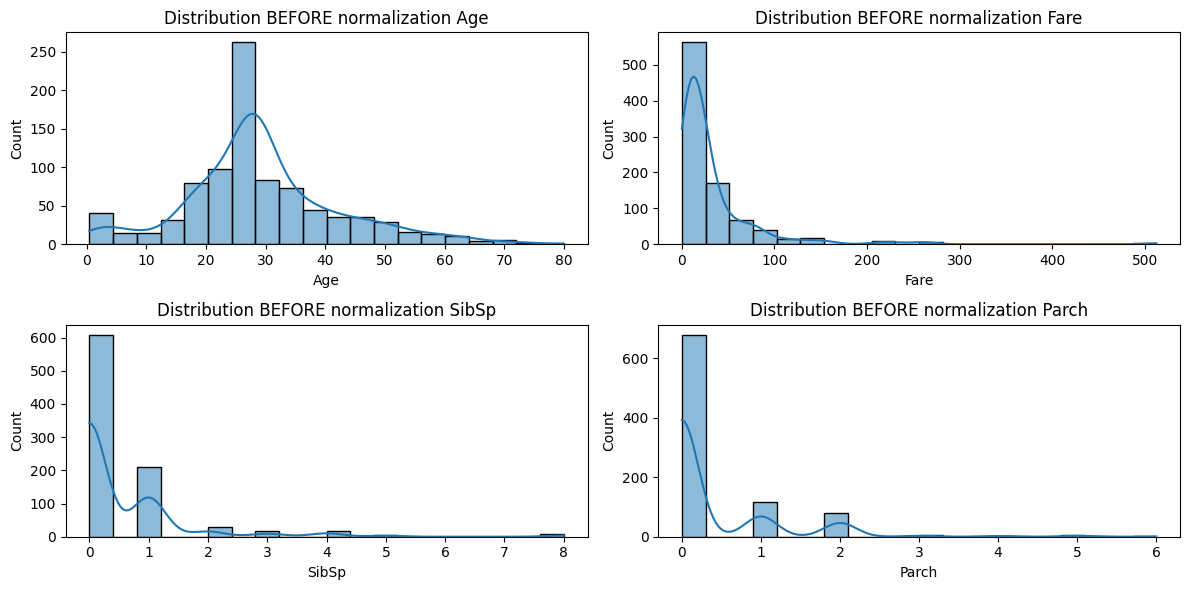

In [ ]:

import seaborn as sns

# Выбираем только числовые признаки
features_numeric = ["Age", "Fare", "SibSp", "Parch"]
df_numeric = df_corrected[features_numeric]

# Создаем субплоты 2х2
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()  # преобразуем в одномерный массив для удобства

# Используем map с lambda для построения графиков без явного цикла
list(map(lambda t: (
    sns.histplot(data=df_numeric, x=t[0], bins=20, kde=True, ax=t[1]),
    t[1].set_title(f"Distribution BEFORE normalization {t[0]}")
), zip(df_numeric.columns, axes)))

plt.tight_layout()
plt.show()



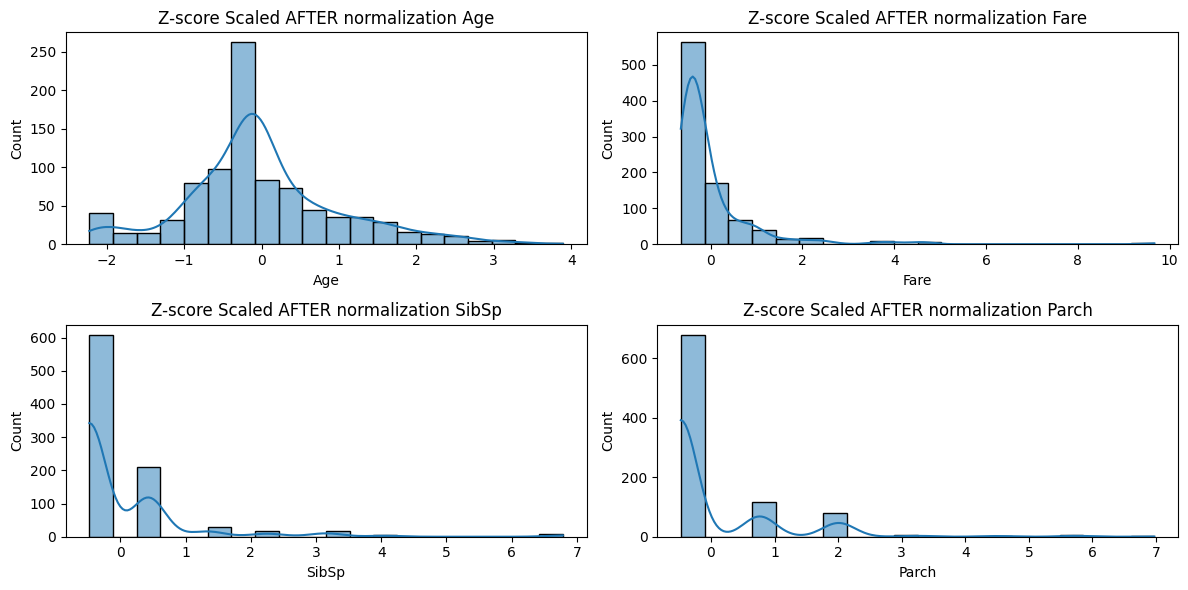

In [ ]:
from sklearn.preprocessing import StandardScaler

# Z-score нормализация
scaler = StandardScaler()
scaler.fit(df_numeric)

df_scaled_normed = scaler.transform(df_numeric)

# Преобразуем результат в dataframe
df_zscore = pd.DataFrame(df_scaled_normed, columns=df_numeric.columns)

# Создаем субплоты 2х2
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()  # преобразуем в одномерный массив для удобства

# Используем map с lambda для построения графиков
list(map(lambda t: sns.histplot(df_zscore[t[0]], bins=20, kde=True, ax=t[1])
         .set_title(f"Z-score Scaled AFTER normalization {t[0]}"),
         zip(df_zscore.columns, axes)))

plt.tight_layout()
plt.show()


### 16

1) Удалить Name и LastName

Они не полезны для машинного обучения.
Name – у каждого пассажира уникальное значение.
LastName – не всегда коррелирует с выживаемостью.

2) Закодировать Sex (бинарный признак)

male - 1, female - 0.


3) Закодировать Embarked

Embarked_C, Embarked_Q, Embarked_S (колонки с 0/1).

4) Переменную Age_group закодируем как количественную переменную

1	Baby

2	Child

3	Teenager

4	Adult

5	Middle-aged

6	Senior

In [ ]:
# Категориальные переменные
categorical_features = df_corrected.select_dtypes(include=['object']).columns.tolist()
print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['Name', 'Sex', 'Embarked', 'LastName']


In [ ]:
# Удаляем ненужные признаки
df_res = df_corrected.drop(columns=["Name", "LastName"])

# Кодируем бинарный признак Sex
df_res["Sex"] = df_res["Sex"].map({"male": 1, "female": 0})

# Кодируем многозначный категориальный признак Embarked
df_res = pd.get_dummies(df_res, columns=["Embarked"])

# Проверяем результат
print("Данные после кодирования:")
df_res


Данные после кодирования:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Age_group,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,2,Adult,False,False,True
1,1,1,0,38.0,1,0,71.2833,2,Middle_Aged,True,False,False
2,1,3,0,26.0,0,0,7.9250,1,Adult,False,False,True
3,1,1,0,35.0,1,0,53.1000,2,Middle_Aged,False,False,True
4,0,3,1,35.0,0,0,8.0500,1,Middle_Aged,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,Adult,False,False,True
887,1,1,0,19.0,0,0,30.0000,1,Adult,False,False,True
888,0,3,0,28.0,1,2,23.4500,4,Adult,False,False,True
889,1,1,1,26.0,0,0,30.0000,1,Adult,True,False,False


In [ ]:
# Создаем числовой признак Age_group
df_res["Age_group"] = pd.cut(df_res["Age"],
                         bins=[0, 5, 14, 18, 30, 60, 100],
                         labels=[1, 2, 3, 4, 5, 6]).astype(int)

# Проверяем результат
df_res.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Age_group,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,2,4,False,False,True
1,1,1,0,38.0,1,0,71.2833,2,5,True,False,False
2,1,3,0,26.0,0,0,7.9250,1,4,False,False,True
3,1,1,0,35.0,1,0,53.1000,2,5,False,False,True
4,0,3,1,35.0,0,0,8.0500,1,5,False,False,True
5,0,3,1,28.0,0,0,8.4583,1,4,False,True,False
6,0,1,1,54.0,0,0,51.8625,1,5,False,False,True
7,0,3,1,2.0,3,1,21.0750,5,1,False,False,True
8,1,3,0,27.0,0,2,11.1333,3,4,False,False,True
9,1,2,0,14.0,1,0,30.0708,2,2,True,False,False


In [ ]:
df_res.shape

(891, 12)

MACHINE LEARNING PART

In [ ]:
# Импортируем нужные модули
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# Определяем признаки (X) и целевую переменную (y)
X = df_res.drop(columns=["Survived"])
y = df_res["Survived"]

# Разделяем данные на тренировочную и тестовую выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
pca = PCA(n_components=8)  # Запускаем PCA с 8 компонентами
pca.fit(df_res)

# Смотрим долю объясненной дисперсии
print(pca.explained_variance_ratio_)
print(f"Сумма 8 компонент: {sum(pca.explained_variance_ratio_[:8])}")


[9.34049646e-01 6.38654597e-02 1.33809727e-03 1.97838706e-04
 1.76107038e-04 1.23195877e-04 9.88757397e-05 7.84671975e-05]
Сумма 8 компонент: 0.9999276874853528


In [ ]:
#НОРМАЛИЗАЦИЯ ДАННЫХ
scaler = StandardScaler()
X_train_normed = scaler.fit_transform(X_train)
X_valid_normed = scaler.transform(X_valid)

# ПРИМЕНЕНИЕ PCA (АНАЛИЗ ГЛАВНЫХ КОМПОНЕНТ)
pca_components = 8  # Выбираем 8 главных компонент
pca = PCA(n_components=pca_components)
pca.fit(X_train_normed)

X_train_pca = pca.transform(X_train_normed)
X_valid_pca = pca.transform(X_valid_normed)

X_train_pca, X_valid_pca

(array([[-0.46987529, -1.03021836,  0.14508936, ...,  0.4191364 ,
          0.34509899,  1.02144562],
        [-0.69703656, -1.09626634,  0.25022045, ...,  0.27986769,
          0.10982115, -0.5992293 ],
        [-0.79469611,  1.65720924,  1.47523915, ...,  2.83941261,
          1.00285222,  1.5489926 ],
        ...,
        [ 2.03847862,  0.70741854,  2.22685521, ..., -2.02085118,
          1.12150001,  0.34314807],
        [-1.81506102,  0.11376272,  1.58663783, ...,  0.69548758,
          0.12250664, -0.82056377],
        [-0.88555054, -0.32088197,  0.68956038, ...,  0.9460078 ,
          0.21126531, -1.09514975]]),
 array([[ 1.12096072, -1.01749811,  0.40175002, ...,  0.55746822,
         -0.90397052,  0.48318265],
        [-0.52587904, -0.86194068,  1.10744198, ..., -0.7018596 ,
          0.8383236 ,  0.39989154],
        [-0.71653605,  0.5946838 , -2.18381609, ..., -0.94709126,
          0.02125233,  0.29122794],
        ...,
        [-0.69215014, -0.98987879,  0.29247656, ...,  

Берем данные гиперпараметры

In [ ]:
# ОБУЧЕНИЕ kNN (K-Nearest Neighbors)
k_neighbors = 5  # Используем k=5 соседей
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train_pca, y_train)

# ПРОВЕРКА ТОЧНОСТИ НА ТЕСТОВЫХ ДАННЫХ
prediction_test = knn.predict(X_valid_pca)

accuracy = accuracy_score(y_valid, prediction_test)
precision = precision_score(y_valid, prediction_test)
recall = recall_score(y_valid, prediction_test)

# Вывод результатов
print(f'Accuracy  = {accuracy:.4f}')
print(f'Precision = {precision:.4f}')
print(f'Recall    = {recall:.4f}')

Accuracy  = 0.8101
Precision = 0.7612
Recall    = 0.7391


In [ ]:
# Подбор pca_components и k_neighbors
precisions, recalls = [], []

for pca_components in [10, 9, 8, 7, 6, 5]:
    for k_neighbors in [1, 2, 4, 5, 7]:
        # Масштабируем данные
        scaler = StandardScaler()
        X_train_normed = scaler.fit_transform(X_train)
        X_valid_normed = scaler.transform(X_valid)

        # Применяем PCA
        pca = PCA(n_components=pca_components)
        pca.fit(X_train_normed)
        X_train_pca = pca.transform(X_train_normed)
        X_valid_pca = pca.transform(X_valid_normed)

        # Обучаем kNN
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_pca, y_train)
        preds_valid = knn.predict(X_valid_pca)

        # Вычисляем метрики
        acc = accuracy_score(y_valid, preds_valid)
        prec = precision_score(y_valid, preds_valid)
        rec = recall_score(y_valid, preds_valid)

        precisions.append(prec)
        recalls.append(rec)

        print(f'Hyperparameters: PCA={pca_components}, k={k_neighbors}')
        print(f'Accuracy  = {acc:.4f}')
        print(f'Precision = {prec:.4f}')
        print(f'Recall    = {rec:.4f}\n')

Hyperparameters: PCA=10, k=1
Accuracy  = 0.7318
Precision = 0.6479
Recall    = 0.6667

Hyperparameters: PCA=10, k=2
Accuracy  = 0.7654
Precision = 0.8140
Recall    = 0.5072

Hyperparameters: PCA=10, k=4
Accuracy  = 0.7877
Precision = 0.7925
Recall    = 0.6087

Hyperparameters: PCA=10, k=5
Accuracy  = 0.8045
Precision = 0.7742
Recall    = 0.6957

Hyperparameters: PCA=10, k=7
Accuracy  = 0.8101
Precision = 0.7778
Recall    = 0.7101

Hyperparameters: PCA=9, k=1
Accuracy  = 0.7318
Precision = 0.6479
Recall    = 0.6667

Hyperparameters: PCA=9, k=2
Accuracy  = 0.7654
Precision = 0.8140
Recall    = 0.5072

Hyperparameters: PCA=9, k=4
Accuracy  = 0.7877
Precision = 0.7925
Recall    = 0.6087

Hyperparameters: PCA=9, k=5
Accuracy  = 0.8045
Precision = 0.7742
Recall    = 0.6957

Hyperparameters: PCA=9, k=7
Accuracy  = 0.8101
Precision = 0.7778
Recall    = 0.7101

Hyperparameters: PCA=8, k=1
Accuracy  = 0.7318
Precision = 0.6522
Recall    = 0.6522

Hyperparameters: PCA=8, k=2
Accuracy  = 0.7709
Pr

In [ ]:
preds_valid = knn.predict(X_valid_pca)
preds_valid

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

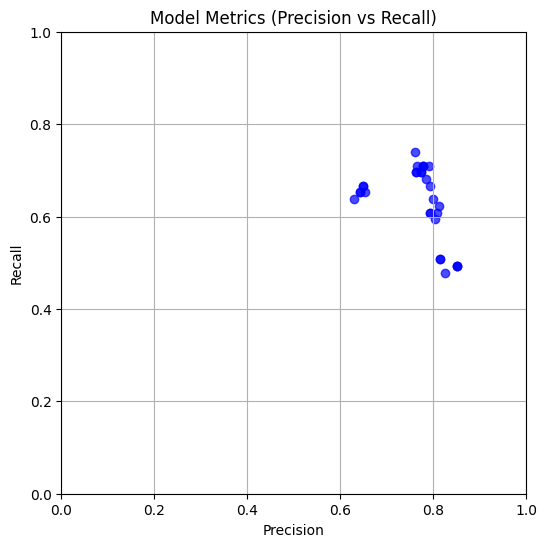

In [ ]:
#ВИЗУАЛИЗАЦИЯ
plt.figure(figsize=(6, 6))
plt.scatter(precisions, recalls, color='blue', alpha=0.7)
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Model Metrics (Precision vs Recall)")
plt.grid(True)
plt.show()

**ГИПЕРПАРАМЕТРЫ**

Hyperparameters: PCA=8, k=5
Accuracy  = 0.8101
Precision = 0.7612
Recall    = 0.7391


Были выбраны данные гиперпараметры, поскольку баланс между Precision и Recall хороший, что означает, что модель не делает слишком много ложных предсказаний.
Из всех реальных выживших модель правильно нашла 73.91%.

**Еще раз прогоняем все шаги**

In [ ]:
# Разделяем признаки (X) и целевую переменную (y)
X = df_res.drop(columns=["Survived"])  # Все колонки, кроме Survived
y = df_res["Survived"]  # Целевая переменная (выжил/не выжил)

# Разделяем данные на тренировочную и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Создаем объект нормализации
scaler = StandardScaler()

# Применяем StandardScaler к тренировочным данным
X_train_normed = scaler.fit_transform(X_train)
X_valid_normed = scaler.transform(X_valid)  # Тестовые данные нормализуем отдельно


In [ ]:
# Выбираем 8 главных компонент
pca = PCA(n_components=8)

# Обучаем PCA на тренировочных данных
pca.fit(X_train_normed)

# Преобразуем данные с помощью PCA
X_train_pca = pca.transform(X_train_normed)
X_valid_pca = pca.transform(X_valid_normed)


In [ ]:
# Создаем модель kNN с 5 соседями
knn = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель
knn.fit(X_train_pca, y_train)

# Делаем предсказания
prediction_valid = knn.predict(X_valid_pca)


In [ ]:
# Оцениваем точность предсказаний
accuracy = accuracy_score(y_valid, prediction_valid)
precision = precision_score(y_valid, prediction_valid)
recall = recall_score(y_valid, prediction_valid)

# Выводим результаты
print(f'Accuracy  = {accuracy:.4f}')
print(f'Precision = {precision:.4f}')
print(f'Recall    = {recall:.4f}')


Accuracy  = 0.8101
Precision = 0.7612
Recall    = 0.7391


In [ ]:
#Загружаем тестовый набор
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
#Удаляем ненужные колонки
drop_cols = ["PassengerId", "Name", "Ticket", "Cabin"]
df_test = df_test.drop(columns=drop_cols)

#Заполняем пропуски
df_test["Age"].fillna(df_test["Age"].median(), inplace=True)
df_test["Fare"].fillna(df_test["Fare"].median(), inplace=True)

#Кодируем категориальные признаки так же, как в тренировочном дф
df_test = pd.get_dummies(df_test, columns=["Sex", "Embarked"])
df_test

<ipython-input-230-8951f6823165>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Age"].fillna(df_test["Age"].median(), inplace=True)
<ipython-input-230-8951f6823165>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,False,True,False,False,True
414,1,39.0,0,0,108.9000,True,False,True,False,False
415,3,38.5,0,0,7.2500,False,True,False,False,True
416,3,27.0,0,0,8.0500,False,True,False,False,True


In [ ]:
#Проверяем, какие колонки есть в тренировочном дф, но отсутствуют в тестовом дф
missing_cols = set(df_res.columns) - set(df_test.columns) - {"Survived"}
extra_cols = set(df_test.columns) - set(df_res.columns)

missing_cols, extra_cols

({'Age_group', 'Family', 'Sex'}, {'Sex_female', 'Sex_male'})

In [ ]:
#Добавляем недостающие колонки в тестовом дф
for col in missing_cols:
    df_test[col] = 0  #как индикатор

In [ ]:
#Удаляем лишние колонки из df_test
df_test = df_test.drop(columns=extra_cols, errors='ignore')

#Порядок колонок совпадает с тренировочным дф (без "Survived")
df_test = df_test[df_res.drop(columns=["Survived"]).columns]
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Family,Age_group,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,0,False,True,False
1,3,0,47.0,1,0,7.0000,0,0,False,False,True
2,2,0,62.0,0,0,9.6875,0,0,False,True,False
3,3,0,27.0,0,0,8.6625,0,0,False,False,True
4,3,0,22.0,1,1,12.2875,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,0,0,False,False,True
414,1,0,39.0,0,0,108.9000,0,0,True,False,False
415,3,0,38.5,0,0,7.2500,0,0,False,False,True
416,3,0,27.0,0,0,8.0500,0,0,False,False,True


In [ ]:
# Применяем PCA к тестовым данным
X_test_pca = pca.transform(X_test_normed)

# Делаем предсказания
prediction_test = knn.predict(X_test_pca)
prediction_test, X_test_pca

(array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
subm = pd.read_csv('gender_submission.csv')  # Загружаем шаблон
subm['Survived'] = prediction_test  # Записываем предсказания
subm.to_csv('submission.csv', index=False)  # Сохраняем файл


In [ ]:
subm.to_csv('test_subm_proba.csv', index=False)